<a href="https://colab.research.google.com/github/mahn-bonnie/Machine-Learning/blob/main/HeartDiseasePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [95]:
import pandas as pd

# **Importing the dataset**

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# **Taking care of values**

In [4]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **Duplicate Values**

In [6]:
data_dup = data.duplicated().any()

In [7]:
data_dup

True

In [8]:
data = data.drop_duplicates()

In [9]:
data_dup = data.duplicated().any()

In [10]:
data_dup

False

# **Data Processing**

In [11]:
cate_val = []

In [12]:
count_val = []

In [13]:
for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        count_val.append(column)

In [14]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [15]:
count_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# **Encoding Categorical Data**

In [16]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [17]:
data['cp'].unique()

array([0, 1, 2, 3])

In [18]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# **Feature Scaling**

In [20]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
st = StandardScaler()
data[count_val] = st.fit_transform(data[count_val])

In [23]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# **Splitting The Dataset Into The Training Set And Test Set**

In [24]:
X = data.drop('target',axis=1)

In [25]:
y = data['target']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [28]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

# **Logistic Regression**

In [29]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred1 = log.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

# **SVC**

In [35]:
from sklearn import svm

In [36]:
svm = svm.SVC()

In [37]:
svm.fit(X_train,y_train)

SVC()

In [38]:
y_pred2 = svm.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

# **KNeighbors Classifier**

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier()

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
y_pred3=knn.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [45]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [46]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [47]:
import matplotlib.pyplot as plt

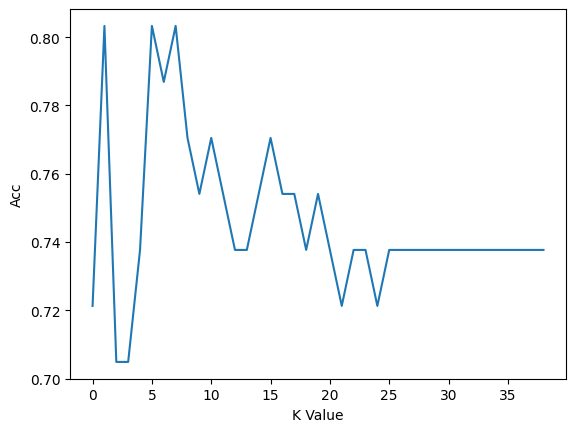

In [48]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [49]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

# **Non-Linear ML Algorithms**

In [50]:
data = pd.read_csv('heart.csv')

In [51]:
data = data.drop_duplicates()

In [52]:
X = data.drop('target',axis=1)
y=data['target']

In [53]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

# **Decision Tree Classifier**

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt = DecisionTreeClassifier()

In [56]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
y_pred4= dt.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

# **Random Forest Classifier**

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf = RandomForestClassifier()

In [61]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
y_pred5= rf.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

# **Gradient Boosting Classifier**

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gbc = GradientBoostingClassifier()

In [66]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [67]:
y_pred6 = gbc.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred6)

0.7868852459016393

In [69]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [70]:
final_data

,Models,ACC
0,LR,78.688525
1,SVM,80.327869
2,KNN,73.770492
3,DT,78.688525
4,RF,83.606557
5,GB,78.688525


In [71]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

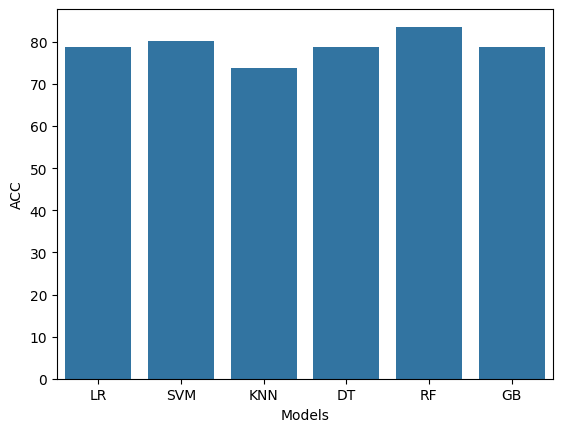

In [72]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

In [73]:
X=data.drop('target',axis=1)
y=data['target']

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

# **Prediction on New Data**

In [76]:
import pandas as pd

In [77]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [78]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [79]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


# **Save Model Using Joblib**

In [80]:
import joblib

In [81]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [82]:
['model_joblib_heart']

['model_joblib_heart']

In [83]:
model = joblib.load('model_joblib_heart')

In [84]:
model.predict(new_data)

array([0])

In [85]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# **GUI**

In [86]:

from tkinter import *
import joblib

In [ ]:
from tkinter import *
import joblib

def show_entry_fields():
    
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = float(e10.get())
    p11 = int(e11.get())
    p12 = int(e12.get())
    p13 = int(e13.get())
    
    
    model = joblib.load('model_joblib_heart')
    
    
    result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    
   
    if result == 0:
        result_label.config(text="No Heart Disease", fg="green")
    else:
        result_label.config(text="Possibility of Heart Disease", fg="red")


master = Tk()
master.title("Heart Disease Prediction System")


header_label = Label(master, text="HEART DISEASE PREDICTION SYSTEM", bg="darkblue", fg="white", font=("Helvetica", 16))
header_label.grid(row=0, columnspan=2, pady=(10, 20))


labels = ["Enter Your Age", "Male Or Female [1/0]", "Value of CP", "Value of trestbps", "Value of chol", 
          "Value of fbs", "Value of restecg", "Value of thalach", "Value of exang", "Value of oldpeak", 
          "Value of slope", "Value of ca", "Value of thal"]

for i, label_text in enumerate(labels, start=1):
    label = Label(master, text=label_text, bg="darkblue", fg="white")
    label.grid(row=i, column=0, pady=(5, 2), padx=(10, 5), sticky="w")

entries = []
for i in range(len(labels)):
    entry = Entry(master)
    entry.grid(row=i+1, column=1, pady=(5, 2), padx=(0, 10), sticky="e")
    entries.append(entry)


predict_button = Button(master, text='Predict', bg='red', fg='white', command=show_entry_fields)
predict_button.grid(row=len(labels)+1, columnspan=2, pady=(20, 10))


result_label = Label(master, text="", font=("Helvetica", 14))
result_label.grid(row=len(labels)+2, columnspan=2, pady=(0, 10))


mainloop()
